In [131]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K

In [132]:
a, b, c = 12.6521, -6531.67, 8972.146842
X = np.linspace(-1000, 1500, 10)
Y = np.vectorize(lambda x: a*x**2 + b*x + c)(X)

tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, (None))
tf_Y = tf.placeholder(tf.float32, (None))
tf_a = tf.Variable(tf.random_normal((1, 1)))
tf_b = tf.Variable(tf.random_normal((1, 1)))
tf_c = tf.Variable(tf.random_normal((1, 1)))

In [133]:
tf_forw = tf.add(tf.add(tf.multiply(tf.square(tf_X), tf_a), 
                        tf.multiply(tf_X, tf_b)), 
                        tf_c)

cost_func = tf.reduce_mean(tf.losses.mean_squared_error(labels=tf_Y, predictions=tf_forw))

In [134]:
optimizer = tf.train.AdamOptimizer(learning_rate=1).minimize(cost_func)

init = tf.global_variables_initializer()

42.17228 [[12.652104]] [[-6531.664]] [[8966.293]]


<IPython.core.display.Javascript object>


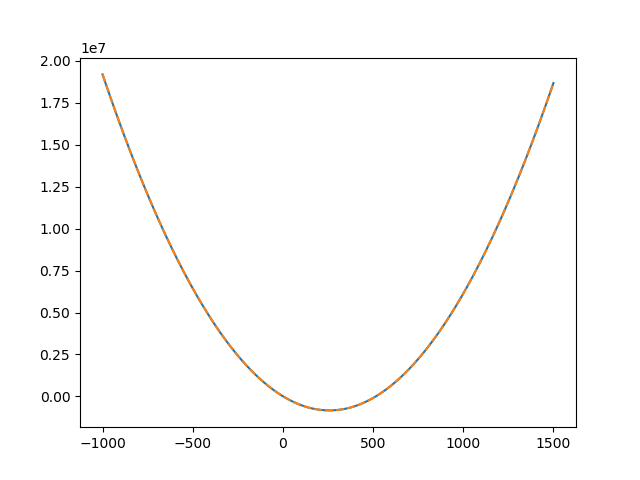

In [125]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10000):
        minibatch_idx = np.arange(0, len(X))
        np.random.shuffle(minibatch_idx)
        
        minibatches = [(X[minibatch_idx[i:i+256]], Y[minibatch_idx[i:i+256]]) for i in range(len(X) // 256)]
        for minibatch_X, minibatch_Y in minibatches:
            sess.run(optimizer, feed_dict={tf_X: minibatch_X, tf_Y: minibatch_Y})
        
    pred = sess.run(tf_forw, feed_dict={tf_X: X})
    cost = sess.run(cost_func, feed_dict={tf_Y: Y, tf_forw: pred})
    print(cost, sess.run(tf_a), sess.run(tf_b), sess.run(tf_c))

%matplotlib notebook
plt.plot(X, pred[0, :])
plt.plot(X, Y, "--")

In [ ]:
X2 = X
Y2 = Y
with tf.Session() as sess:
    sess.run(init)
    
    costs = []
    for i in range(1000000):
        sess.run(optimizer, feed_dict={tf_X: X2, tf_Y: Y2})
        
    pred = sess.run(tf_forw, feed_dict={tf_X: X})
    cost = sess.run(cost_func, feed_dict={tf_Y: Y, tf_forw: pred})
    print(cost, sess.run(tf_a), sess.run(tf_b), sess.run(tf_c))

%matplotlib notebook
plt.plot(X, pred[0, :])
plt.plot(X, Y, "--")